
# Project: "WeRateDogs" tweets cleaning and investigation
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#G1">Gathering: (twitter-archive-enhanced.csv) dataset</a></li>
<li><a href="#Ass1">Assessing: (twitter-archive-enhanced.csv) dataset</a></li>
<li><a href="#C1">Cleaning: (twitter-archive-enhanced.csv) dataset</a></li>
<li><a href="#G2">Gathering: (image-predictions.tsv) dataset</a></li>
<li><a href="#Ass2">Assessing: (image-predictions.tsv) dataset</a></li>
<li><a href="#C2">Cleaning: (image-predictions.tsv) dataset</a></li>
<li><a href="#G3">Gathering: (text_json.json) dataset</a></li>
<li><a href="#Ass3">Assessing: (text_json.json) dataset</a></li>
<li><a href="#C3">Cleaning: (text_json.json) dataset</a></li>
<li><a href="#DI">Data Investigation</a></li>
</ul>

<a id='intro'></a>
# Introduction
This project aims to gather, assess, and clean a dataset contains tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. WeRateDogs has over 4 million followers and has received international media coverage.

There are 3 files I used to gather the data from and they can be mentioned as follows:
- `twitter-archive-enhanced.csv`: The WeRateDogs Twitter archive.
- `image_predictions.tsv`: The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network.
- `tweet_json.txt`: Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting.

The dataset is messy and dirty where it has many quality and tidiness issues. Accordingly, in this notebook I tried to figure out some of these issues using Pandas, NumPy, Matplotlib, and Json libraries and solve it programmatically. As a result,       8 quality issues and 4 tidiness appeared as follows:

- `twitter-archive-enhanced.csv`: 8 quality issues and 1 tidiness issue.
- `image_predictions.tsv`: 1 tidiness issue
- `tweet_json.txt`: 1 tidiness issue
- One dataset should contain the whole records instead of three above 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

<a id='G1'></a>
# Data Gathering: `twitter-archive-enhanced.csv`

In [2]:
archieve = pd.read_csv('twitter-archive-enhanced.csv')
archieve.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


<a id='Ass1'></a>

# Assessing: `twitter-archive-enhanced.csv`

## Check dataset info

In [3]:
archieve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## Check dataset numerical values validity

In [4]:
archieve.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


## Check duplicated id(s)

In [5]:
archieve.tweet_id.duplicated().sum()

0

## Check dogs names validity

In [6]:
 names = archieve.name.unique().tolist() 

In [7]:
missed_names = []
for name in names:
    if ((name[0].islower() == True)):
        missed_names.append(name)
missed_names        

['such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'mad',
 'an',
 'very',
 'just',
 'my',
 'his',
 'actually',
 'getting',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

## Write the text on text editor file to identify the problem 

In [8]:
for name in missed_names:
    path = r'C:\Users\zaidg\Desktop\text\{}_names.txt'.format(name)
    archieve[archieve.name == name].text.to_csv(path,header=False)

### Quality Issues (Q.I): 
 **Q.I.1:** `timestamp` column should be as `datetime` type instead of `object` type 
 
 **Q.I.2:** Some records with all-None stages (doggo,floofer,pupper,puppo) can be re-extracted from the `text` column to find the stage
 
 **Q.I.3:** Delete records that not present dogs. 
 
 **Q.I.4:** Find the missed names in the `name` column 
 
 **Q.I.5:** Delete records that are not presenting as a new tweet
 
 **Q.I.6:** Re-extract the rating numerator for invalid rantings or delete the records have no-valid rating in the `text` column 

 **Q.I.7:** Set the `rating_denominator` column values all to 10
 
 **Q.I.8:** Extract the source name from the url given in the `source` column

### Tidiness Issues (T.I): 

 **T.I.1:** Create one column for the dog stage `dog_stage` instead of the 4 excited columns
 





<a id='C1'></a>

# Cleaning: `twitter-archive-enhanced.csv`

### Create a new dataset to work on using .copy() 


In [9]:
df = archieve.copy()

### Convert the the `timestamp` dtype to be datetime  using .to_datetime() and show the new info to check

In [10]:
df.timestamp = pd.to_datetime(df.timestamp)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Create `dog_stage` column with `Not_mentioned` as a default value

In [11]:
df['dog_stage'] = 'Not_mentioned'

### Use the `text` column values to extract the dog stage and delete not-dog records using for loop and if statement . Show the dataset head to check

In [12]:
for i in range(df.shape[0]):
   try: 
    if ((df.text[i].count('only rate dogs') > 0) | ((df.text[i].count('not a dog'))>0)) : 
        df.drop(i)
        
    elif (('pupper' in df.text.values[i])):
        df['dog_stage'][i] = 'pupper'
    
    elif (('pup' in df.text.values[i]) | ('puppo' in df.text.values[i])):
        df['dog_stage'][i] = 'puppo'
        
    elif (('doggo' in df.text.values[i])):
        df['dog_stage'][i] = 'doggo'
        
    elif (('floofer' in df.text.values[i])):
        df['dog_stage'][i] = 'floofer'    
   except:
    print(i)
df.head()

C:\Users\zaidg\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\zaidg\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\zaidg\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\zaidg\a

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,Not_mentioned
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,puppo
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,Not_mentioned
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,Not_mentioned
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,Not_mentioned


### Delete the 4 stages columns using .drop() and show the new info to check

In [13]:
df.drop(['pupper','puppo','floofer','doggo'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Count the stages frequency  

In [14]:
df.dog_stage.value_counts()

Not_mentioned    1727
puppo             275
pupper            272
doggo              79
floofer             3
Name: dog_stage, dtype: int64

### After dropping records, reseting the index is required

In [15]:
df.reset_index(inplace=True, drop=True)

### Extract the correct names instead of the names with lowercase values, from the `text` column values

In [16]:
for name in missed_names:
 for i in range(df.shape[0]):
    try:
        named_index = df.text[i].find('named')
        dot_index = df.text[i].find('.')
        
        if ((df.name[i] == name) & (named_index != -1 )):
             print(df.text[i][named_index+6:dot_index])
             df.name[i] = df.text[i][named_index+6:dot_index]   
    except:
        pass

Wylie
Kip
Jacob (Yacōb)
Rufus
Spork
Cherokee
Hemry
Alphred
Alfredo
Leroi
Chuk
Alfonso
Cheryl
Jessiga
Klint
Kohl
Pepe
Octaviath
Johm


C:\Users\zaidg\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Berta


### Check a random name


In [17]:
df[df.name == 'Alphred']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323...,10,10,Alphred,Not_mentioned


### Remove records with names start with lowercase (these are invalid records)

In [18]:
print(df[df['name'].isin(missed_names)].shape)  
df = df[~df['name'].isin(missed_names)]
df.info()

(89, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2267 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2267 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2267 non-null   datetime64[ns, UTC]
 4   source                      2267 non-null   object             
 5   text                        2267 non-null   object             
 6   retweeted_status_id         176 non-null    float64            
 7   retweeted_status_user_id    176 non-null    float64            
 8   retweeted_status_timestamp  176 non-null    object             
 9   expanded_urls               2208 non-null   object             
 10  rating_numerator            2267 non-null   int64  

### Now we can ensure that each `None` named record is valid but the dog's name is not given in the tweet

In [19]:
df['name'] = df.name.replace('None','Not_given')

### Get the indices of the records that not present tweets using .index and drop them using .drop()

In [20]:
indices = df[df['retweeted_status_id'].notna()].index
df.drop(indices, inplace=True)
indices = df[df['in_reply_to_status_id'].notna()].index
df.drop(indices, inplace=True)


### Drop the unused columns using .drop()

In [21]:
df.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2013 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2013 non-null   int64              
 1   timestamp           2013 non-null   datetime64[ns, UTC]
 2   source              2013 non-null   object             
 3   text                2013 non-null   object             
 4   expanded_urls       2010 non-null   object             
 5   rating_numerator    2013 non-null   int64              
 6   rating_denominator  2013 non-null   int64              
 7   name                2013 non-null   object             
 8   dog_stage           2013 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 157.3+ KB


### Check  the records with invalid rating numerator (after trying, tweets with numerator larger than 14 have not valid rating value)

In [22]:
df[df.rating_numerator > 14].shape[0]

16

In [23]:
 df[df.rating_numerator > 14].text.values # All invalid rating

array(['The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
       'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
       "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
       "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
       'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
       "This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh",
       'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq',
       "Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mp

### Choose only records with valid numerator

In [24]:
df =  df[df.rating_numerator < 15]

### Display the new statistical info.

In [25]:
df.describe()

,tweet_id,rating_numerator,rating_denominator
count,1.997000e+03,1997.000000,1997.000000
mean,7.376528e+17,10.628443,10.006009
std,6.753881e+16,2.126546,0.225978
min,6.660209e+17,0.000000,10.000000
25%,6.769579e+17,10.000000,10.000000
50%,7.102967e+17,11.000000,10.000000
75%,7.899865e+17,12.000000,10.000000
max,8.924206e+17,14.000000,20.000000


### Check the records with invalid denominator 

In [26]:
df[df.rating_denominator != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1068,740373189193256964,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,Not_given,Not_mentioned
1165,722974582966214656,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,Not_given,Not_mentioned
1662,682962037429899265,2016-01-01 16:30:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,Not_mentioned


### Correct the numerator and denominator values for the shown indices and show the new statistical info.

In [27]:
df[df.rating_denominator != 10].text.values
# indix 1068 --> 14/10
# indix 1165 --> 13/10
# indix 1662 --> 10/10

array(['After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ',
       'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a',
       'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5'],
      dtype=object)

In [28]:
df.rating_numerator[1068] = 14
df.rating_numerator[1165] = 13
df.rating_numerator[1662] = 10

df.rating_denominator[1068] = 10
df.rating_denominator[1165] = 10
df.rating_denominator[1662] = 10

df.describe()

C:\Users\zaidg\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\zaidg\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\zaidg\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\zaidg\

,tweet_id,rating_numerator,rating_denominator
count,1.997000e+03,1997.000000,1997.0
mean,7.376528e+17,10.636955,10.0
std,6.753881e+16,2.121532,0.0
min,6.660209e+17,0.000000,10.0
25%,6.769579e+17,10.000000,10.0
50%,7.102967e+17,11.000000,10.0
75%,7.899865e+17,12.000000,10.0
max,8.924206e+17,14.000000,10.0


### Now we can drop the `text` column as we finished extracting the missed/deleting the invalid values

In [29]:
df.drop('text', axis=1,inplace=True) # Now no need for text column

### Display the sources of tweets

In [30]:
df.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

### Check that the all shown sources represents the whole records using (assert)

In [31]:
df[df.source.str.contains('iPhone')].source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'],
      dtype=object)

In [32]:
df[df.source.str.contains('TweetDeck')].source.unique()

array(['<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [33]:
df[df.source.str.contains('Vine')].source.unique()

array(['<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'],
      dtype=object)

In [34]:
df[df.source.str.contains('Web Client')].source.unique()

array(['<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'],
      dtype=object)

In [35]:
assert df.shape[0] == df[df.source.str.contains('Web Client')].count()[0] + df[df.source.str.contains('Vine')].count()[0] + df[df.source.str.contains('TweetDeck')].count()[0] + df[df.source.str.contains('iPhone')].count()[0]

### Reseting index is required for the next step

In [36]:
df.reset_index(inplace=True, drop=True)

### Use for loop and if statement to set the valid sources values for each record (instead of url)

In [37]:
df['source_copy'] = ''

for i in range(df.shape[0]):
   try:
    if ('iPhone' in df.source[i] ):
        df.source_copy[i] = 'iPhone'
    elif ('Vine' in df.source[i]):
        df.source_copy[i] = 'Vine'
    elif ('TweetDeck' in df.source[i]):
        df.source_copy[i] = 'TweetDeck'    
    elif ('Web Client' in df.source[i]):
        df.source_copy[i] = 'Web Client'
   except:
    pass
df.source_copy.unique()        

C:\Users\zaidg\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\zaidg\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\zaidg\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\zaidg\anaconda3\lib\site-packages\ipykernel_launcher.py:10: Set

array(['iPhone', 'Web Client', 'Vine', 'TweetDeck'], dtype=object)

### Check the process of conversion was done successfully 

In [38]:
df[df.source_copy == '']

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,source_copy


### Drop the old `source` column (that contains URLs) and set the new one

In [39]:
df.drop('source', axis=1, inplace=True)
df.rename(columns={"source_copy": "source"},inplace=True)
df.tail()

,tweet_id,timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,source
1992,666082916733198337,2015-11-16 02:38:37+00:00,https://twitter.com/dog_rates/status/666082916...,6,10,Not_given,Not_mentioned,iPhone
1993,666073100786774016,2015-11-16 01:59:36+00:00,https://twitter.com/dog_rates/status/666073100...,10,10,Not_given,Not_mentioned,iPhone
1994,666071193221509120,2015-11-16 01:52:02+00:00,https://twitter.com/dog_rates/status/666071193...,9,10,Not_given,Not_mentioned,iPhone
1995,666049248165822465,2015-11-16 00:24:50+00:00,https://twitter.com/dog_rates/status/666049248...,5,10,Not_given,Not_mentioned,iPhone
1996,666020888022790149,2015-11-15 22:32:08+00:00,https://twitter.com/dog_rates/status/666020888...,8,10,Not_given,Not_mentioned,iPhone


### `expanded_urls` column is not used, so lets drop it

In [40]:
df.drop('expanded_urls',axis=1,inplace=True)

### Save the new dataset as `tweet_rating_cleaned.csv` using to_csv()

In [41]:
df.to_csv('tweet_rating_cleaned.csv', index=False)

<a id='G2'></a>
# Gathering: `image-predictions.tsv`

In [42]:
images = pd.read_csv('image-predictions.tsv', sep='\t')
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


<a id='Ass2'></a>
# Assessing: `image-predictions.tsv`

In [43]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [44]:
images.tweet_id.duplicated().any()

False


## Tidiness Issue:
**T.I.2**: Create one column that represents the breed value instead of the used method


<a id='C2'></a>
# Cleaning: `image-predictions.tsv`

### Create a copy dataset from the original using .copy() 

In [45]:
df_images = images.copy() 

### Create `breed` column and set its default value to `''` .
### Use for loop and if statements to most confident breed value between the three algorithms 

In [46]:
df_images['breed'] = ''
for i in range(df_images.shape[0]):
    conf_arr = np.array([df_images.p1_conf[i],df_images.p2_conf[i], df_images.p3_conf[i]])
    prediction_arr = np.array([df_images.p1[i],df_images.p2[i],df_images.p3[i]])
    isIt_dog = np.array([df_images.p1_dog[i],df_images.p2_dog[i],df_images.p3_dog[i]])
    max_index = np.argmax(conf_arr)

    if(isIt_dog[max_index] == True):                     
          df_images.breed[i] = prediction_arr[max_index]
    else:
           conf_arr = np.delete(conf_arr, max_index)   
           max_index = np.argmax(conf_arr)
           if(isIt_dog[max_index]):                     
                df_images.breed[i] = prediction_arr[max_index]
           else:
                conf_arr = np.delete(conf_arr, max_index)   
                max_index = np.argmax(conf_arr)
               
                if(isIt_dog[max_index]):                     
                     df_images.breed[i] = prediction_arr[max_index]
                else:
                     df_images.breed[i] = 'Not_dog'           
                         
                         

df_images.breed    

C:\Users\zaidg\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\zaidg\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0       Welsh_springer_spaniel
1                      redbone
2              German_shepherd
3          Rhodesian_ridgeback
4           miniature_pinscher
                 ...          
2070                    basset
2071                   Not_dog
2072                 Chihuahua
2073                 Chihuahua
2074                   Not_dog
Name: breed, Length: 2075, dtype: object

### Check the process of conversion was done successfully 

In [47]:
df_images[df_images.breed =='']    

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed


### Drop all columns except the `tweet_id` and `breed`  using .drop()

In [48]:
df_images.drop(df_images.columns.difference(['tweet_id','breed']), axis=1,inplace=True)

### Display the new info.

In [49]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2075 non-null   int64 
 1   breed     2075 non-null   object
dtypes: int64(1), object(1)
memory usage: 32.5+ KB


### Save the new dataset as `tweet_breed.csv` using to_csv()


In [50]:
df_images.to_csv('tweet_breed.csv', index=False)

<a id='G3'></a>
# Gathering: `tweet_json.txt`

In [51]:
import json

data = []
with open('tweet_json') as f:
    for line in f:
        data.append(json.loads(line))

<a id='Ass3'></a>
# Assessing: `tweet_json.txt`

In [52]:
data[1]
#'retweet_count': 6514,
# 'favorite_count': 33819
# id

{'created_at': 'Tue Aug 01 00:17:27 +0000 2017',
 'id': 892177421306343426,
 'id_str': '892177421306343426',
 'full_text': "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
 'truncated': False,
 'display_text_range': [0, 138],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892177413194625024,
    'id_str': '892177413194625024',
    'indices': [139, 162],
    'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
    'url': 'https://t.co/0Xxu71qeIV',
    'display_url': 'pic.twitter.com/0Xxu71qeIV',
    'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w

### Tidiness Issue:
**T.I.3**: We should represent the `id`,`retweet_count`, and `favorite_count` in a `dataframe` with three columns [`tweet_id`, `retweet_count`, `favorite_count`]

**T.I.4**: Merge the `breed`,`retweet_count`, and `favorite_count` columns with the `twitter_archive_cleaned.csv` dataFrame

<a id='C3'></a>
# Cleaning: `tweet_json.txt`

### Create an empty dataset called `df_tweets` using pd.DataFrame() and set its values using for loop and .append() from the `tweet_json` file

### Display the new dataset details, info, and head records

In [53]:
df_tweets = pd.DataFrame(columns=['tweet_id','retweet_count','favorite_count'])

for dic in range(len(data)):
    tweet_id = data[dic]['id']
    retweet_count = data[dic]['retweet_count']
    favorite_count = data[dic]['favorite_count']
    
    dict_result = {'tweet_id':tweet_id, 'retweet_count':retweet_count, 'favorite_count':favorite_count}
    df_tweets = df_tweets.append(dict_result, ignore_index=True)
    
print(df_tweets.info())
df_tweets.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   object
 2   favorite_count  2354 non-null   object
dtypes: object(3)
memory usage: 55.3+ KB
None


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Check if duplicated tweet id is occurred

In [54]:
df_tweets.tweet_id.duplicated().any() #Ensure no error 

False

##  Copy the CLEANED twitter_archieve dataset 

In [55]:
df_rating =  df.copy() # copy the CLEANED twitter_archieve dataset 
print(df_rating.info())
df_rating.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1997 non-null   int64              
 1   timestamp           1997 non-null   datetime64[ns, UTC]
 2   rating_numerator    1997 non-null   int64              
 3   rating_denominator  1997 non-null   int64              
 4   name                1997 non-null   object             
 5   dog_stage           1997 non-null   object             
 6   source              1997 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 109.3+ KB
None


,tweet_id,timestamp,rating_numerator,rating_denominator,name,dog_stage,source
0,892420643555336193,2017-08-01 16:23:56+00:00,13,10,Phineas,Not_mentioned,iPhone
1,892177421306343426,2017-08-01 00:17:27+00:00,13,10,Tilly,puppo,iPhone
2,891815181378084864,2017-07-31 00:18:03+00:00,12,10,Archie,Not_mentioned,iPhone
3,891689557279858688,2017-07-30 15:58:51+00:00,13,10,Darla,Not_mentioned,iPhone
4,891327558926688256,2017-07-29 16:00:24+00:00,12,10,Franklin,Not_mentioned,iPhone


### Use .merge() function to merge `df_tweets` and `df_rating` datasets by the left join on the tweet_id column as a joining key

### Display the new dataset details, info, and head records

In [56]:
df_merged = pd.merge(df_rating, df_tweets, left_on='tweet_id', right_on='tweet_id', how='left')
df_merged.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,dog_stage,source,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,13,10,Phineas,Not_mentioned,iPhone,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,13,10,Tilly,puppo,iPhone,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,12,10,Archie,Not_mentioned,iPhone,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,13,10,Darla,Not_mentioned,iPhone,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,12,10,Franklin,Not_mentioned,iPhone,9774,41048


In [57]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 1996
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1997 non-null   object             
 1   timestamp           1997 non-null   datetime64[ns, UTC]
 2   rating_numerator    1997 non-null   int64              
 3   rating_denominator  1997 non-null   int64              
 4   name                1997 non-null   object             
 5   dog_stage           1997 non-null   object             
 6   source              1997 non-null   object             
 7   retweet_count       1997 non-null   object             
 8   favorite_count      1997 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 156.0+ KB


### Use .merge() function to merge `df_merged` and `df_images` (`breed` column) datasets by the left join on the tweet_id column as a joining key

In [58]:
df_merged = pd.merge(df_merged,df_images, left_on='tweet_id',right_on='tweet_id',how='left')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 1996
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1997 non-null   object             
 1   timestamp           1997 non-null   datetime64[ns, UTC]
 2   rating_numerator    1997 non-null   int64              
 3   rating_denominator  1997 non-null   int64              
 4   name                1997 non-null   object             
 5   dog_stage           1997 non-null   object             
 6   source              1997 non-null   object             
 7   retweet_count       1997 non-null   object             
 8   favorite_count      1997 non-null   object             
 9   breed               1877 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 171.6+ KB


### Convert the `timestamp` dtype to `datetime` with the format `YYYY-mm-dd` using pd.to_datetime()

### Display the new info.

In [59]:
df_merged['timestamp'] = pd.to_datetime(df_merged['timestamp'], format='%Y-%m-%d')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 1996
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1997 non-null   object             
 1   timestamp           1997 non-null   datetime64[ns, UTC]
 2   rating_numerator    1997 non-null   int64              
 3   rating_denominator  1997 non-null   int64              
 4   name                1997 non-null   object             
 5   dog_stage           1997 non-null   object             
 6   source              1997 non-null   object             
 7   retweet_count       1997 non-null   object             
 8   favorite_count      1997 non-null   object             
 9   breed               1877 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 171.6+ KB


### Replace breeds with NaN values into `Not_mentioned` string

In [60]:
df_merged = df_merged.replace(np.nan, 'Not_mentioned', regex=True)
(df_merged.breed.isnull()).any()

False

### Remove records with `Not_dog` breed value 

In [61]:
df_merged = df_merged[df_merged.breed != 'Not_dog']
(df_merged.breed == 'Not_dog').any()

False

In [62]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1515 entries, 1 to 1996
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1515 non-null   int64              
 1   timestamp           1515 non-null   datetime64[ns, UTC]
 2   rating_numerator    1515 non-null   int64              
 3   rating_denominator  1515 non-null   int64              
 4   name                1515 non-null   object             
 5   dog_stage           1515 non-null   object             
 6   source              1515 non-null   object             
 7   retweet_count       1515 non-null   int64              
 8   favorite_count      1515 non-null   int64              
 9   breed               1515 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(5), object(4)
memory usage: 130.2+ KB


### Save the `df_merged` dataset as `twitter_archive_master.csv` using to_csv()

In [63]:
df_merged.to_csv('twitter_archive_master.csv',index=False)

<a id='DI'></a>
# Data Investigation

In [64]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,dog_stage,source,retweet_count,favorite_count,breed
0,892177421306343426,2017-08-01 00:17:27+00:00,13,10,Tilly,puppo,iPhone,6514,33819,Chihuahua
1,891815181378084864,2017-07-31 00:18:03+00:00,12,10,Archie,Not_mentioned,iPhone,4328,25461,Chihuahua
2,891327558926688256,2017-07-29 16:00:24+00:00,12,10,Franklin,Not_mentioned,iPhone,9774,41048,basset
3,891087950875897856,2017-07-29 00:08:17+00:00,13,10,Not_given,Not_mentioned,iPhone,3261,20562,Chesapeake_Bay_retriever
4,890971913173991426,2017-07-28 16:27:12+00:00,13,10,Jax,Not_mentioned,iPhone,2158,12041,Appenzeller


### Q1: What is the most popular (liked) breed?

In [65]:
breed_grouped = df.groupby('breed')
max_index = np.argmax(breed_grouped.favorite_count.count())
popular_breed = breed_grouped.favorite_count.count().keys()[max_index]

print('The most liked breed is: ' + popular_breed)

The most liked breed is: golden_retriever


### Q2: Which stage has the highest mean rating numerator?

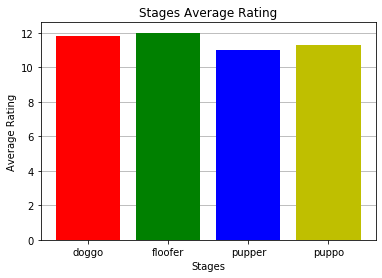

In [66]:
stage_grouped = df.groupby('dog_stage')
mean_rates = stage_grouped.rating_numerator.mean().tolist()[1:]
stages =['doggo','floofer','pupper','puppo']

plt.bar(stages,mean_rates, zorder=2, color='rgbymc')
plt.title('Stages Average Rating')
plt.xlabel('Stages')
plt.ylabel('Average Rating')
plt.grid(axis='y', zorder=0);


### Q3: Show the correlation between the `rating_numerator`, `retweet_count`, and `favorite_count`?

In [67]:
corrMatrix = df.corr()
corrMatrix = corrMatrix.drop(['tweet_id','rating_denominator'],axis=1).drop(['tweet_id','rating_denominator'],axis=0)

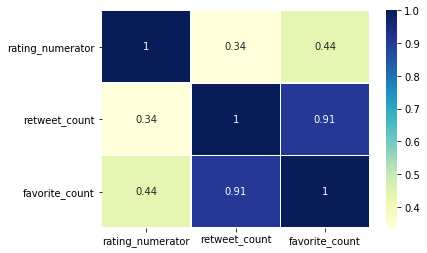

In [68]:
import seaborn as sn 
sn.heatmap(corrMatrix, annot=True, linewidths=.5, cmap="YlGnBu")
plt.show()

### Q4: Visualize the sources usage frequency and find the one with the largest use

{'iPhone': 1400, 'Vine': 87, 'Web Client': 21, 'TweetDeck': 7}


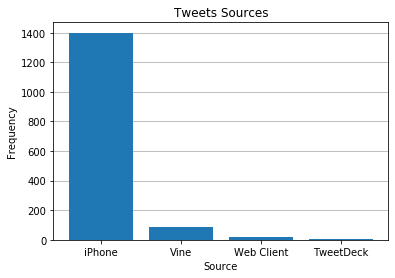

In [69]:
freq_arr = np.array([df.source.value_counts()[0],df.source.value_counts()[1],df.source.value_counts()[2],df.source.value_counts()[3]])
sources = ['iPhone','Vine','Web Client','TweetDeck']
plt.bar(sources,freq_arr, zorder=2)
plt.title('Tweets Sources')
plt.xlabel('Source')
plt.ylabel('Frequency')
plt.grid(axis='y', zorder=0);

print(dict(df.source.value_counts()))